# Preparing Dataset

In [1]:
import pandas as pd

df = pd.read_csv('Dataset/selected-crime-data.csv')
print(df.shape)

unique_crimes = df['OFNS_DESC'].unique()

print(unique_crimes)
print(unique_crimes.size)

(1048575, 15)
['HARRASSMENT 2' 'CRIMINAL MISCHIEF & RELATED OF' 'PETIT LARCENY'
 'ASSAULT 3 & RELATED OFFENSES' 'ROBBERY' 'VEHICLE AND TRAFFIC LAWS'
 'OFF. AGNST PUB ORD SENSBLTY &' 'CANNABIS RELATED OFFENSES'
 'GRAND LARCENY OF MOTOR VEHICLE' 'GRAND LARCENY' 'DANGEROUS DRUGS'
 'BURGLARY' 'FELONY ASSAULT' 'MISCELLANEOUS PENAL LAW'
 'OFFENSES AGAINST PUBLIC ADMINI' 'OTHER OFFENSES RELATED TO THEF'
 'OFFENSES AGAINST THE PERSON' 'CRIMINAL TRESPASS'
 'ALCOHOLIC BEVERAGE CONTROL LAW' 'RAPE' 'FORGERY' 'SEX CRIMES'
 'INTOXICATED & IMPAIRED DRIVING' 'DANGEROUS WEAPONS'
 'POSSESSION OF STOLEN PROPERTY' 'ADMINISTRATIVE CODE'
 'NYS LAWS-UNCLASSIFIED FELONY' 'ESCAPE 3' 'OFFENSES INVOLVING FRAUD'
 'FRAUDS' 'OFFENSES AGAINST PUBLIC SAFETY' 'JOSTLING'
 'OTHER STATE LAWS (NON PENAL LA' 'ARSON' 'THEFT-FRAUD'
 'UNAUTHORIZED USE OF A VEHICLE' 'MURDER & NON-NEGL. MANSLAUGHTER'
 "BURGLAR'S TOOLS" 'FRAUDULENT ACCOSTING'
 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED' 'ENDAN WELFARE INCOMP'
 'KIDNAPPING & RELATED O

In [2]:
relevant_crimes = [
    'HARRASSMENT 2', 'CRIMINAL MISCHIEF & RELATED OF', 'PETIT LARCENY',
    'ASSAULT 3 & RELATED OFFENSES', 'ROBBERY', 'VEHICLE AND TRAFFIC LAWS',
    'DANGEROUS DRUGS', 'GRAND LARCENY OF MOTOR VEHICLE', 'GRAND LARCENY',
    'BURGLARY', 'FELONY ASSAULT', 'DANGEROUS WEAPONS', 'CRIMINAL TRESPASS',
    'RAPE', 'SEX CRIMES', 'INTOXICATED & IMPAIRED DRIVING', 'POSSESSION OF STOLEN PROPERTY',
    'DISORDERLY CONDUCT', 'THEFT OF SERVICES', 'MURDER & NON-NEGL. MANSLAUGHTER',
    'HOMICIDE-NEGLIGENT,UNCLASSIFIE', 'KIDNAPPING', 'INTOXICATED/IMPAIRED DRIVING',
    'OFFENSES RELATED TO CHILDREN'
]

df_filtered = df[df['OFNS_DESC'].isin(relevant_crimes)]

print(df_filtered.head())
print(f"Size of the filtered DataFrame: {df_filtered.shape}")

  CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM                       OFNS_DESC  \
0  279761734   12/31/2023     09:15:00                   HARRASSMENT 2   
1  279750929   12/30/2023     15:00:00  CRIMINAL MISCHIEF & RELATED OF   
2  279756057   12/31/2023     12:46:00                   PETIT LARCENY   
3  279739269   12/31/2023     00:00:00    ASSAULT 3 & RELATED OFFENSES   
4  279755987   12/31/2023     12:26:00                   PETIT LARCENY   

    LAW_CAT_CD BORO_NM LOC_OF_OCCUR_DESC               PREM_TYP_DESC  \
0    VIOLATION  QUEENS            INSIDE             RESIDENCE-HOUSE   
1  MISDEMEANOR  QUEENS           REAR OF  RESIDENCE - PUBLIC HOUSING   
2  MISDEMEANOR  QUEENS            INSIDE                 GAS STATION   
3  MISDEMEANOR  QUEENS          FRONT OF                      STREET   
4  MISDEMEANOR   BRONX            INSIDE            FOOD SUPERMARKET   

  X_COORD_CD Y_COORD_CD   Latitude  Longitude                  Lat_Lon  \
0  10,33,098   2,14,255  40.754623 -73.823687  (

In [3]:
df_filtered = df_filtered[df_filtered['LOC_OF_OCCUR_DESC'] != 'INSIDE']
print(f"Size of the filtered DataFrame: {df_filtered.shape}")

Size of the filtered DataFrame: (440088, 15)


In [4]:
df_sampled = df_filtered.sample(frac=0.25)
print(f"Size of the filtered DataFrame: {df_sampled.shape}")

Size of the filtered DataFrame: (110022, 15)


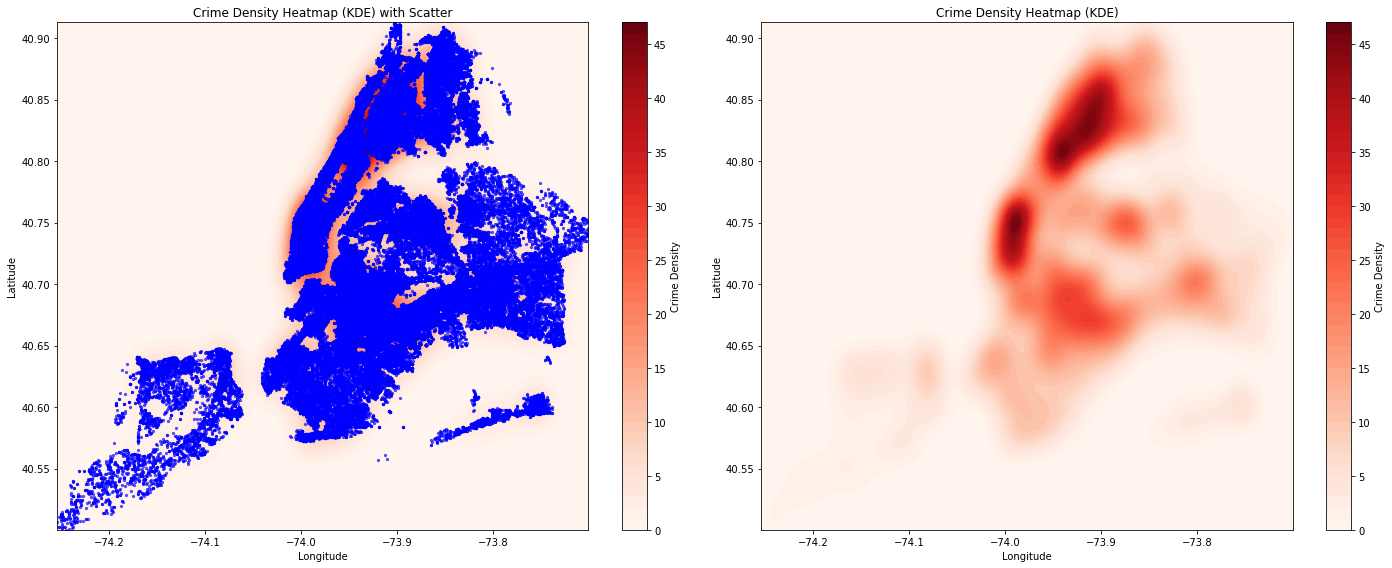

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde

crime_data = df_sampled

# Extract latitude and longitude data
crime_locations = crime_data[['Latitude', 'Longitude']].dropna()

# Convert latitude and longitude to numpy array
coords = crime_locations.to_numpy()

# KDE bandwidth selection using Scott's Rule
def scotts_bandwidth(data):
    n = len(data)
    d = data.shape[1]  # Number of dimensions
    return np.power(n, -1. / (d + 4)) * np.std(data, axis=0).mean()

# Apply KDE using Gaussian Kernel
bandwidth = scotts_bandwidth(coords)
kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
kde.fit(coords)

# Create a mesh grid for plotting the heatmap
x_min, x_max = crime_locations['Longitude'].min(), crime_locations['Longitude'].max()
y_min, y_max = crime_locations['Latitude'].min(), crime_locations['Latitude'].max()

# Create grid
x_grid = np.linspace(x_min, x_max, 100)
y_grid = np.linspace(y_min, y_max, 100)
X, Y = np.meshgrid(x_grid, y_grid)
xy_grid = np.vstack([Y.ravel(), X.ravel()]).T

# Evaluate KDE on grid points
log_density = kde.score_samples(xy_grid)
density = np.exp(log_density).reshape(X.shape)

fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Plot the contourf plot with scatter on the first subplot
contourf1 = axs[0].contourf(X, Y, density, levels=50, cmap='Reds')
scatter = axs[0].scatter(crime_locations['Longitude'], crime_locations['Latitude'], c='blue', s=5, alpha=0.6)
fig.colorbar(contourf1, ax=axs[0], label='Crime Density')
axs[0].set_title('Crime Density Heatmap (KDE) with Scatter')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')

# Plot only the contourf plot on the second subplot
contourf2 = axs[1].contourf(X, Y, density, levels=50, cmap='Reds')
fig.colorbar(contourf2, ax=axs[1], label='Crime Density')
axs[1].set_title('Crime Density Heatmap (KDE)')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')

plt.tight_layout() 
plt.show()

In [1]:
!pip install geopandas osmnx

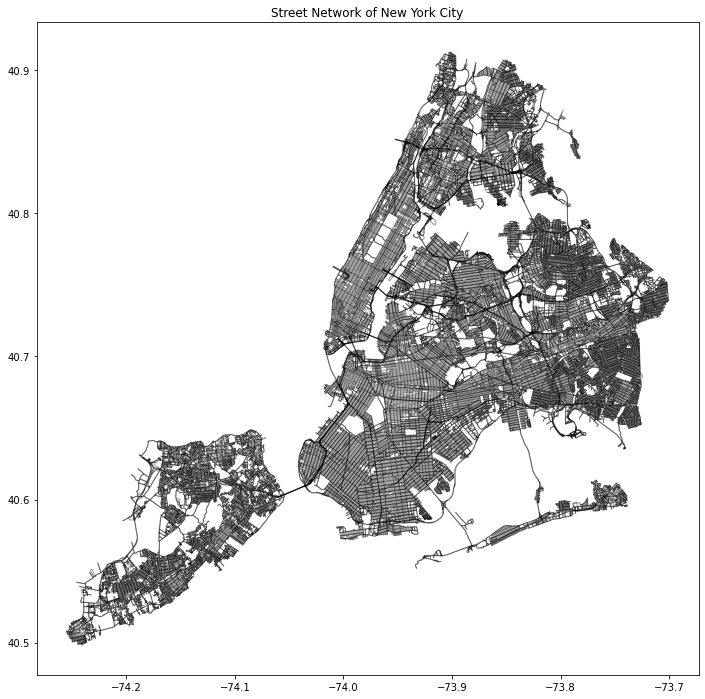

In [19]:
import osmnx as ox
import geopandas as gpd

import matplotlib.pyplot as plt

# Download the street network of New York City
G = ox.graph_from_place('New York City, New York, USA', network_type='drive')

# Convert the graph to a GeoDataFrame
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

# Plot the street network
fig, ax = plt.subplots(figsize=(12, 12))
gdf_edges.plot(ax=ax, linewidth=1, edgecolor='black', alpha=0.4)
plt.title('Street Network of New York City')
plt.show()

No path found between 42837412 and 4202789394


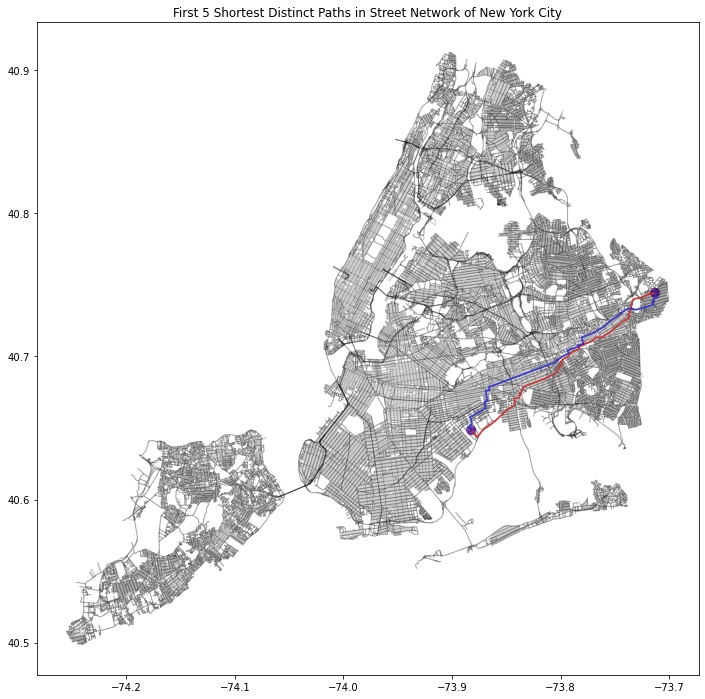

In [22]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import osmnx as ox

# Randomly choose two nodes from the graph
nodes = list(G.nodes)
start_node = random.choice(nodes)
end_node = random.choice(nodes)

def find_shortest_paths(G, source, target, num_paths=5):
    paths = []
    G_temp = G.copy()
    for _ in range(num_paths):
        try:
            path = nx.shortest_path(G_temp, source=source, target=target, weight='length')
            paths.append(path)
            
            # Remove edges in the current path to find a different path next time
            for i in range(len(path) - 1):
                if G_temp.has_edge(path[i], path[i + 1]):
                    G_temp.remove_edge(path[i], path[i + 1])
        
        except nx.NetworkXNoPath:
            print(f"No path found between {source} and {target}")
            break
    
    return paths

# Get 5 distinct shortest paths
paths = find_shortest_paths(G, start_node, end_node, num_paths=5)

# Extract the subgraph containing the nodes in the paths
nodes_in_paths = set()
for path in paths:
    nodes_in_paths.update(path)
subgraph = G.subgraph(nodes_in_paths)

# Convert the subgraph to a GeoDataFrame
gdf_nodes_sub, gdf_edges_sub = ox.graph_to_gdfs(subgraph)

# Plot the entire street network
fig, ax = plt.subplots(figsize=(12, 12))
gdf_edges.plot(ax=ax, linewidth=1, edgecolor='black', alpha=0.2)

# Plot the subgraph with the paths highlighted
gdf_edges_sub.plot(ax=ax, linewidth=1, edgecolor='gray')

# Plot each path with a different color
colors = ['red', 'blue', 'green', 'purple', 'orange']
for i, path in enumerate(paths):
    if i >= len(colors):
        break
    ox.plot_graph_route(subgraph, path, route_linewidth=2, route_color=colors[i], ax=ax, show=False, close=False)

plt.title('First 5 Shortest Distinct Paths in Street Network of New York City')
plt.show()


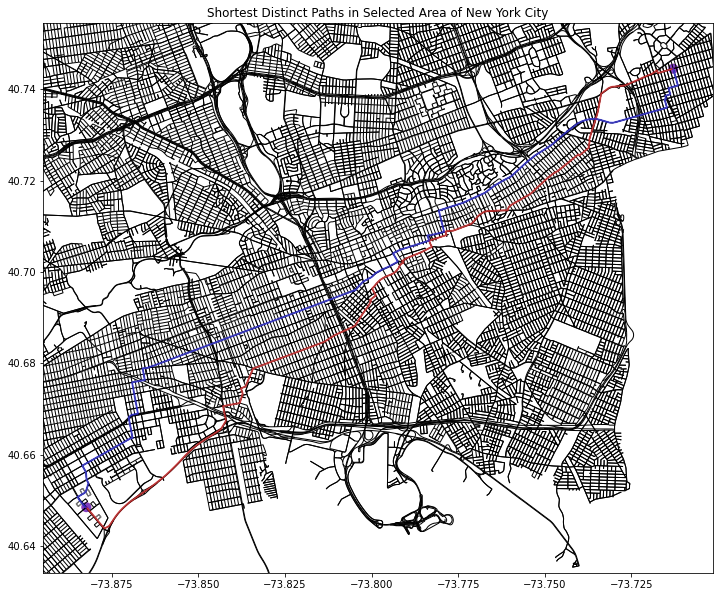

In [23]:
# Determine the bounding box for the nodes of interest
latitudes = [gdf_nodes_sub.loc[node]['y'] for node in nodes_in_paths]
longitudes = [gdf_nodes_sub.loc[node]['x'] for node in nodes_in_paths]

min_lat, max_lat = min(latitudes), max(latitudes)
min_lon, max_lon = min(longitudes), max(longitudes)

# Expand the bounding box a bit for better visualization
buffer = 0.01
min_lat -= buffer
max_lat += buffer
min_lon -= buffer
max_lon += buffer

# Plot the entire street network
fig, ax = plt.subplots(figsize=(12, 12))
gdf_edges.plot(ax=ax, linewidth=1, edgecolor='black')

gdf_edges_sub.plot(ax=ax, linewidth=1, edgecolor='gray')

colors = ['red', 'blue', 'green', 'purple', 'orange']
for i, path in enumerate(paths):
    if i >= len(colors):
        break
    ox.plot_graph_route(subgraph, path, route_linewidth=2, route_color=colors[i], ax=ax, show=False, close=False)

# Set axis limits to zoom in on the area of interest
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)

plt.title('Shortest Distinct Paths in Selected Area of New York City')
plt.show()


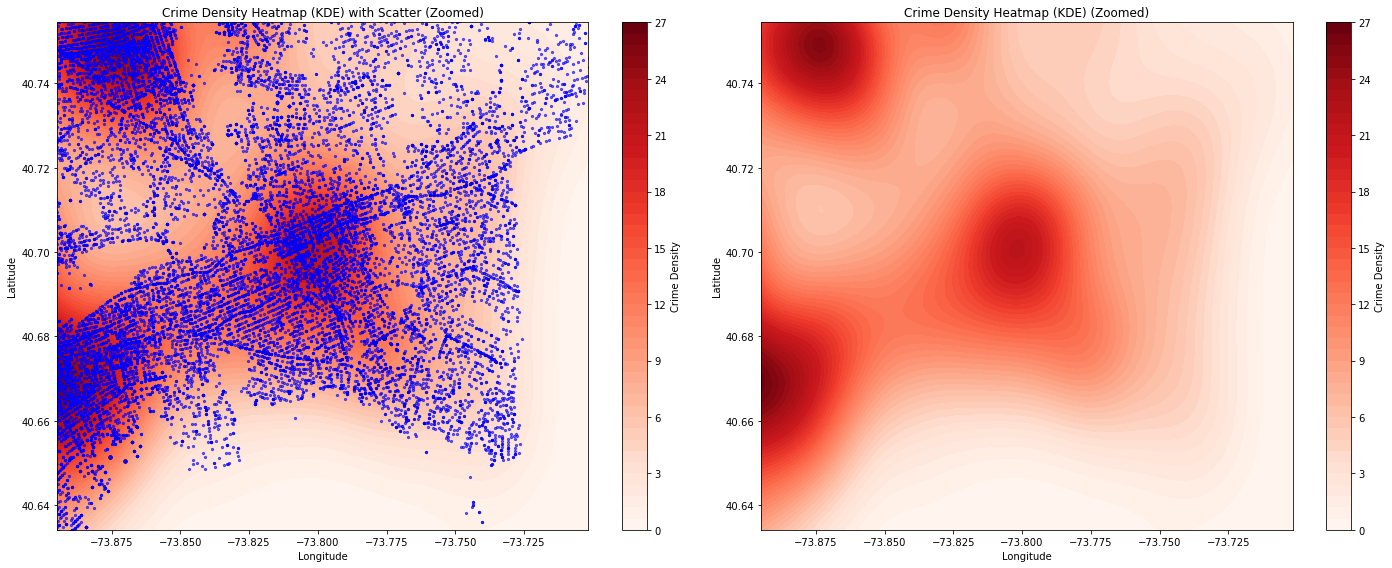

In [34]:

latitudes = [gdf_nodes_sub.loc[node]['y'] for node in nodes_in_paths]
longitudes = [gdf_nodes_sub.loc[node]['x'] for node in nodes_in_paths]

min_lat, max_lat = min(latitudes), max(latitudes)
min_lon, max_lon = min(longitudes), max(longitudes)

buffer = 0.01
min_lat -= buffer
max_lat += buffer
min_lon -= buffer
max_lon += buffer

x_grid_zoomed = np.linspace(min_lon, max_lon, 100)
y_grid_zoomed = np.linspace(min_lat, max_lat, 100)
X_zoomed, Y_zoomed = np.meshgrid(x_grid_zoomed, y_grid_zoomed)
xy_grid_zoomed = np.vstack([Y_zoomed.ravel(), X_zoomed.ravel()]).T

# Evaluate KDE on grid points within the new bounding box
log_density_zoomed = kde.score_samples(xy_grid_zoomed)
density_zoomed = np.exp(log_density_zoomed).reshape(X_zoomed.shape)

fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Plot the contourf plot with scatter on the first subplot within the new bounding box
contourf1_zoomed = axs[0].contourf(X_zoomed, Y_zoomed, density_zoomed, levels=50, cmap='Reds')
scatter_zoomed = axs[0].scatter(crime_locations['Longitude'], crime_locations['Latitude'], c='blue', s=5, alpha=0.6)
fig.colorbar(contourf1_zoomed, ax=axs[0], label='Crime Density')
axs[0].set_title('Crime Density Heatmap (KDE) with Scatter (Zoomed)')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')
axs[0].set_xlim(min_lon, max_lon)
axs[0].set_ylim(min_lat, max_lat)

# Plot only the contourf plot on the second subplot within the new bounding box
contourf2_zoomed = axs[1].contourf(X_zoomed, Y_zoomed, density_zoomed, levels=50, cmap='Reds')
fig.colorbar(contourf2_zoomed, ax=axs[1], label='Crime Density')
axs[1].set_title('Crime Density Heatmap (KDE) (Zoomed)')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')
axs[1].set_xlim(min_lon, max_lon)
axs[1].set_ylim(min_lat, max_lat)

plt.tight_layout()  # Adjust layout to make room for labels and titles
plt.show()


In [35]:
# Function to calculate the crime density score for a given path
def calculate_path_density_score(path, kde):
    latitudes = [gdf_nodes_sub.loc[node]['y'] for node in path]
    longitudes = [gdf_nodes_sub.loc[node]['x'] for node in path]
    path_points = np.vstack([latitudes, longitudes]).T
    log_density_scores = kde.score_samples(path_points)
    density_scores = np.exp(log_density_scores)
    total_score = np.sum(density_scores)
    return total_score

# Calculate the crime density score for each path
path_scores = {i: calculate_path_density_score(path, kde) for i, path in enumerate(paths)}

# Print the scores for each path
for path_index, score in path_scores.items():
    print(f"Path {path_index}: Crime Density Score = {score}")

Path 0: Crime Density Score = 2436.543767168998
Path 1: Crime Density Score = 3353.189532867382


In [11]:
# Drop any rows where 'boro' is missing (null)
crime_data = crime_data.dropna(subset=['BORO_NM'])

# 2. Calculate the Frequency of Crimes per Borough
crime_count_by_boro = crime_data['BORO_NM'].value_counts()

# 3. Normalize the Risk Scores (Proportional to the Frequency of Crimes)
total_crimes = crime_count_by_boro.sum()
risk_scores_by_boro = crime_count_by_boro / total_crimes

# 4. Store the Results in a DataFrame
risk_scores_df = pd.DataFrame({
    'Borough': risk_scores_by_boro.index,
    'Crime Count': crime_count_by_boro.values,
    'Risk Score': risk_scores_by_boro.values*100000
})

# Display the DataFrame
print(risk_scores_df)

         Borough  Crime Count    Risk Score
0       BROOKLYN        31061  28231.626402
1         QUEENS        26702  24269.691516
2          BRONX        24022  21833.815055
3      MANHATTAN        22587  20529.530458
4  STATEN ISLAND         5174   4702.695824
5         (null)          476    432.640745


In [12]:
# Drop any rows where 'boro' is missing (null)
crime_data_large = df_filtered.dropna(subset=['BORO_NM'])

# 2. Calculate the Frequency of Crimes per Borough
crime_count_by_boro2 = crime_data_large['BORO_NM'].value_counts()

# 3. Normalize the Risk Scores (Proportional to the Frequency of Crimes)
total_crimes2 = crime_count_by_boro2.sum()
risk_scores_by_boro2 = crime_count_by_boro2 / total_crimes2

# 4. Store the Results in a DataFrame
risk_scores_df2 = pd.DataFrame({
    'Borough': risk_scores_by_boro2.index,
    'Crime Count': crime_count_by_boro2.values,
    'Risk Score': risk_scores_by_boro2.values*100000
})

# Display the DataFrame
print(risk_scores_df2)

         Borough  Crime Count    Risk Score
0       BROOKLYN       123900  28153.460217
1         QUEENS       107168  24351.493338
2          BRONX        95801  21768.600825
3      MANHATTAN        90679  20604.742688
4  STATEN ISLAND        20592   4679.064187
5         (null)         1948    442.638745


In [13]:
from scipy.stats import spearmanr

merged_df = pd.merge(risk_scores_df[['Borough', 'Risk Score']], 
                     risk_scores_df2[['Borough', 'Risk Score']], 
                     on='Borough', 
                     suffixes=('_small', '_large'))

# Calculate Spearman rank correlation coefficient between the two risk score columns
spearman_corr, p_value = spearmanr(merged_df['Risk Score_small'], merged_df['Risk Score_large'])

# Output the results
print(f"Spearman Correlation Coefficient: {spearman_corr:.4f}")
print(f"P-value: {p_value:.4f}")


Spearman Correlation Coefficient: 1.0000
P-value: 0.0000


In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity
from collections import defaultdict

# Ensure df_sampled is defined and loaded
# Example: df_sampled = pd.read_csv('path_to_your_file.csv')

# Load the dataset
data = df_sampled
data = data.dropna(subset=['BORO_NM', 'Latitude', 'Longitude'])

# Define bandwidth for KDE (you might need to adjust this value)
bandwidth = 0.4

# Separate coordinates and boroughs
coordinates = data[['Latitude', 'Longitude']].values
boroughs = data['BORO_NM'].values

# Create a KDE model
kde2 = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(coordinates)

# Evaluate KDE on the same points to get densities
densities = np.exp(kde2.score_samples(coordinates))

# Add density to the dataframe
data['Density'] = densities

# Calculate the total crime density per borough
borough_density = data.groupby('BORO_NM')['Density'].sum()

# Calculate the total crime density for all data
total_density = borough_density.sum()

# Calculate the risk score for each borough
risk_scores = borough_density / total_density

# Print average risk score for each borough
print("Average risk scores for each borough:")
for boro, score in risk_scores.items():
    print(f"{boro}: {score:.4f}")


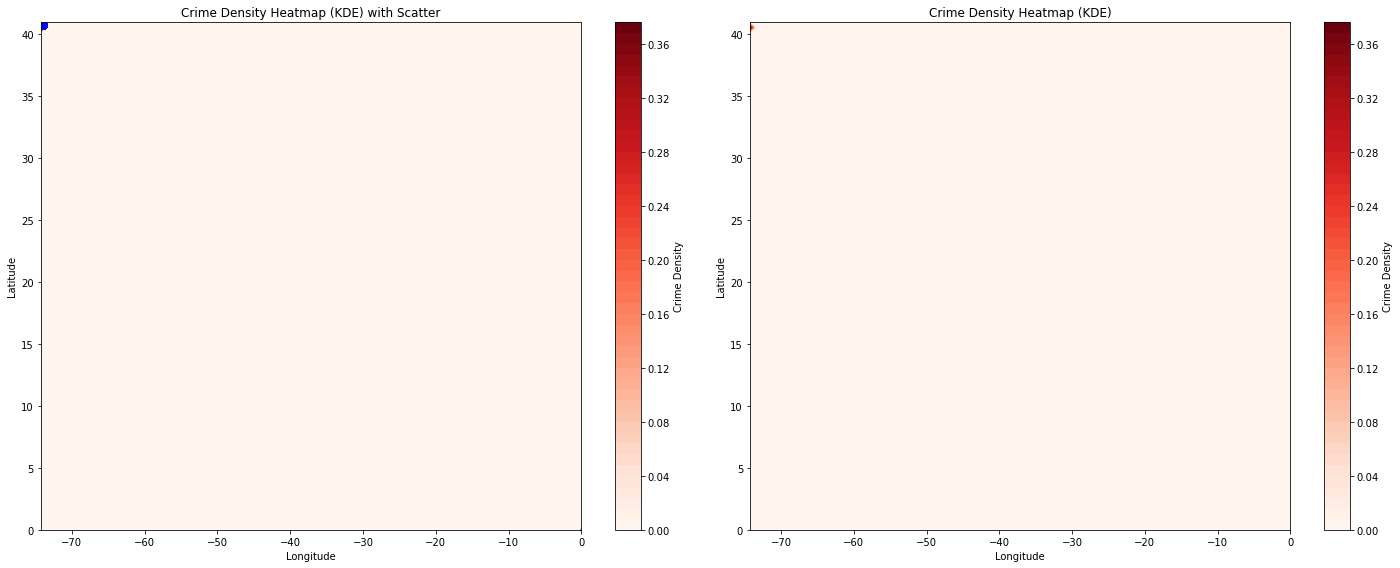

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde

crime_data2 = df_filtered

# Extract latitude and longitude data
crime_locations = crime_data2[['Latitude', 'Longitude']].dropna()

# Convert latitude and longitude to numpy array
coords = crime_locations.to_numpy()

# KDE bandwidth selection using Scott's Rule
def scotts_bandwidth(data):
    n = len(data)
    d = data.shape[1]  # Number of dimensions
    return np.power(n, -1. / (d + 4)) * np.std(data, axis=0).mean()

# Apply KDE using Gaussian Kernel
bandwidth = scotts_bandwidth(coords)
kde2 = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
kde2.fit(coords)

# Create a mesh grid for plotting the heatmap
x_min, x_max = crime_locations['Longitude'].min(), crime_locations['Longitude'].max()
y_min, y_max = crime_locations['Latitude'].min(), crime_locations['Latitude'].max()

# Create grid
x_grid = np.linspace(x_min, x_max, 100)
y_grid = np.linspace(y_min, y_max, 100)
X, Y = np.meshgrid(x_grid, y_grid)
xy_grid = np.vstack([Y.ravel(), X.ravel()]).T

# Evaluate KDE on grid points
log_density = kde2.score_samples(xy_grid)
density = np.exp(log_density).reshape(X.shape)

fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Plot the contourf plot with scatter on the first subplot
contourf1 = axs[0].contourf(X, Y, density, levels=50, cmap='Reds')
scatter = axs[0].scatter(crime_locations['Longitude'], crime_locations['Latitude'], c='blue', s=5, alpha=0.6)
fig.colorbar(contourf1, ax=axs[0], label='Crime Density')
axs[0].set_title('Crime Density Heatmap (KDE) with Scatter')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')

# Plot only the contourf plot on the second subplot
contourf2 = axs[1].contourf(X, Y, density, levels=50, cmap='Reds')
fig.colorbar(contourf2, ax=axs[1], label='Crime Density')
axs[1].set_title('Crime Density Heatmap (KDE)')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')

plt.tight_layout() 
plt.show()

In [8]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity
from scipy.stats import spearmanr


# Evaluate KDE on the same points to get densities
densities1 = np.exp(kde.score_samples(crime_data))
densities2 = np.exp(kde2.score_samples(crime_data2))

# Rank the densities
ranks1 = pd.Series(densities1).rank().values
ranks2 = pd.Series(densities2).rank().values

# Calculate Spearman rank correlation
spearman_corr, p_value = spearmanr(ranks1, ranks2)

print(f"Spearman Rank Correlation: {spearman_corr:.4f}")
print(f"P-value: {p_value:.4f}")

C:\Users\adity\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KernelDensity was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: '267171825H1'